In [48]:
%config InlineBackend.figure_format = 'retina'

# Task 1 

In [49]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
import cma

### Rosenbrock Function 

$$f(x, y) = (a - x)^2 + b(y - x^2)^2$$

Minima global = (x, y) = (1, 1) where f(1,1) = 0

### Rastrigin Function

$$f(x) = 10n + \sum_{i=1}^{n} \left[x_i^2 - 10\cos(2\pi x_i)\right]$$

Global Minima: $x = (0, 0, \dots, 0)$ where $f(x) = 0$


### Ackley Function

$$f(x) = -20 \exp\left(-0.2 \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}\right) - \exp\left(\frac{1}{n} \sum_{i=1}^{n} \cos(2\pi x_i)\right) + 20 + e$$

Global Minima: $x = (0, 0, \dots, 0)$ where $f(x) = 0$



## Strategies for optimizations

### Nelder-Mead
A derivative-free optimization algorithm using a simplex of $n+1$ points for $n$-dimensional problems. Operations:
1. **Reflection**: $x_r = x_c + \alpha (x_c - x_w)$
2. **Expansion**: $x_e = x_c + \gamma (x_r - x_c)$
3. **Contraction**: $x_c = x_c + \rho (x_w - x_c)$
4. **Shrinkage**: Shrinks simplex towards the best point.

### Simulated Annealing
A probabilistic algorithm inspired by annealing in metallurgy. Key steps:
1. **Acceptance Probability**: $P(\Delta E) = \exp\left(-\frac{\Delta E}{T}\right)$
2. **Temperature Schedule**: $T_k = T_0 \cdot \alpha^k$, where $\alpha \in (0, 1)$.

### CMA-ES
A stochastic optimization algorithm adapting the covariance matrix of a multivariate normal distribution:
1. **Sampling**: $x_i \sim \mathcal{N}(m, \sigma^2 C)$
2. **Update Mean**: $m = \sum_{i=1}^\lambda w_i x_i$
3. **Update Covariance**: 
    $$C = (1 - c_1 - c_\mu) C + c_1 p_c p_c^\top + c_\mu \sum_{i=1}^\lambda w_i (x_i - m)(x_i - m)^\top$$


### Defining the benchmark functions 

In [50]:
def rosenbrock_function(input_vector):
    """
    Rosenbrock function: A non-convex function used to test optimization methods.
    """
    return sum(100.0 * (input_vector[1:] - input_vector[:-1]**2.0)**2 + (1 - input_vector[:-1])**2)

def rastrigin_function(input_vector):
    """
    Rastrigin function: A highly multimodal function used for testing global optimization techniques.
    """
    return 10 * len(input_vector) + sum(input_vector**2 - 10 * np.cos(2 * np.pi * input_vector))

def ackley_function(input_vector):
    """
    Ackley function: A commonly used test function with many local minima.
    """
    dimension = len(input_vector)
    return -20 * np.exp(-0.2 * np.sqrt(sum(input_vector**2) / dimension)) \
           - np.exp(sum(np.cos(2 * np.pi * input_vector)) / dimension) + 20 + np.e

### Defining Optimization methods

In [51]:
def apply_optimization(target_function, optimization_method, search_bounds, num_dimensions=2):
    """
    Applies an optimization method to minimize a given function.
    
    Parameters:
    - target_function: The function to be minimized.
    - optimization_method: The chosen optimization algorithm.
    - search_bounds: The boundaries for search space.
    - num_dimensions: Number of dimensions in the search space.
    
    Returns:
    - optimized_params: The best parameters found.
    - optimized_value: The function value at the optimized parameters.
    - execution_time: Time taken for optimization.
    """
    start_time = time.time()
    
    if optimization_method == 'nelder-mead':
        result = minimize(target_function, x0=np.zeros(num_dimensions), method='Nelder-Mead', options={'maxiter': 5000})
    elif optimization_method == 'simulated-annealing':
        result = dual_annealing(target_function, bounds=search_bounds, maxiter=5000)
    elif optimization_method == 'cma-es':
        cma_optimizer = cma.CMAEvolutionStrategy(np.zeros(num_dimensions), 0.5)
        optimization_result = cma_optimizer.optimize(target_function, maxiter=5000).result
        result = {'x': optimization_result[0], 'fun': optimization_result[1]}
    else:
        raise ValueError("Unknown optimization method")
    
    execution_time = time.time() - start_time
    return result['x'], result['fun'], execution_time

num_dimensions = 2  #Number of dimensions for fn optimization
search_bounds = [(-5, 5)] * num_dimensions  #Search space bounds for opti`mization`
optimization_methods = ['nelder-mead', 'simulated-annealing', 'cma-es'] 

#benchmarks
benchmark_functions = {
    'Rosenbrock': rosenbrock_function,
    'Rastrigin': rastrigin_function,
    'Ackley': ackley_function
}

global_minima_values = {'Rosenbrock': 0, 'Rastrigin': 0, 'Ackley': 0}  # Known minimum values of functions

optimization_results = {}

for function_name, function in benchmark_functions.items():
    optimization_results[function_name] = {}
    for method in optimization_methods:
        best_parameters, best_function_value, time_taken = apply_optimization(function, method, search_bounds, num_dimensions)
        absolute_error = abs(best_function_value - global_minima_values[function_name])  # Compute error from the known minimum
        optimization_results[function_name][method] = {
            'params': best_parameters,
            'error': absolute_error,
            'time': time_taken
        }
        print("#"*25)
        print(f"{function_name} - {method}: Error {absolute_error:.6f}, Time {time_taken:.2f}s")
        print("#"*25)

#########################
Rosenbrock - nelder-mead: Error 0.000000, Time 0.00s
#########################
#########################
Rosenbrock - simulated-annealing: Error 0.000000, Time 1.84s
#########################
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=415725, Sat Mar 29 22:50:01 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 1.355152212171039e+00 1.0e+00 3.73e-01  3e-01  3e-01 0:00.0
    2     12 1.126914460591392e+00 1.3e+00 2.74e-01  2e-01  2e-01 0:00.0
    3     18 8.913003830138065e-01 1.2e+00 2.32e-01  1e-01  2e-01 0:00.0
  100    600 1.175392513509609e-16 4.2e+01 1.60e-05  2e-08  4e-08 0:00.0
#########################
Rosenbrock - cma-es: Error 0.000000, Time 0.05s
#########################
#########################
Rastrigin - nelder-mead: Error 0.000000, Time 0.00s
#########################


/Users/aryan/Desktop/Academics /Semester 4/Mathematical Foundations for AI/coding1_assignment_cs303/venv/lib/python3.10/site-packages/cma/interfaces.py:188: UserWarning: ignoring unkown argument {'maxiter': 5000} in OOOptimizer.optimize
  warnings.warn(


#########################
Rastrigin - simulated-annealing: Error 0.000000, Time 0.78s
#########################
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=323819, Sat Mar 29 22:50:02 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 1.321609836438660e+01 1.0e+00 4.20e-01  4e-01  4e-01 0:00.0
    2     12 1.734614649066415e+00 1.2e+00 3.50e-01  3e-01  3e-01 0:00.0
    3     18 3.249282369935003e+00 1.1e+00 2.88e-01  2e-01  2e-01 0:00.0
   72    432 3.552713678800501e-15 1.4e+00 5.70e-06  6e-09  7e-09 0:00.0
#########################
Rastrigin - cma-es: Error 0.000000, Time 0.04s
#########################
#########################
Ackley - nelder-mead: Error 0.000000, Time 0.00s
#########################
#########################
Ackley - simulated-annealing: Error 0.000000, Time 3.44s
#########################
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=359254, Sat Mar 29 22:50:06 2025)
Iterat #Fevals   function value  ax

### Visualization

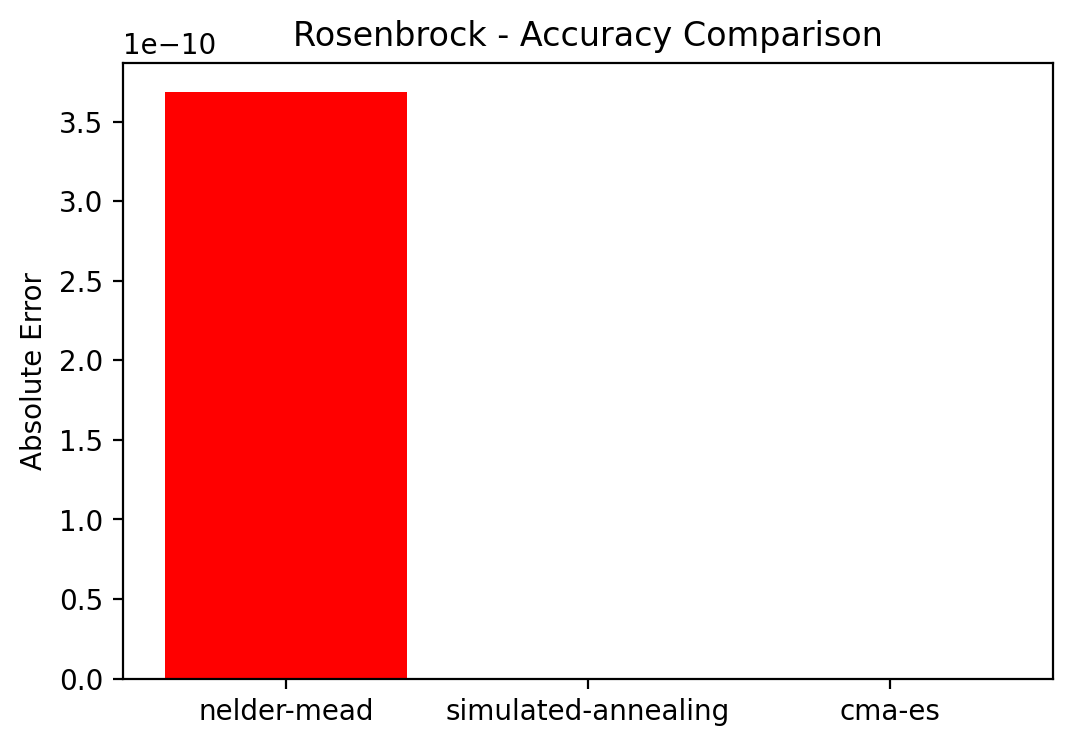

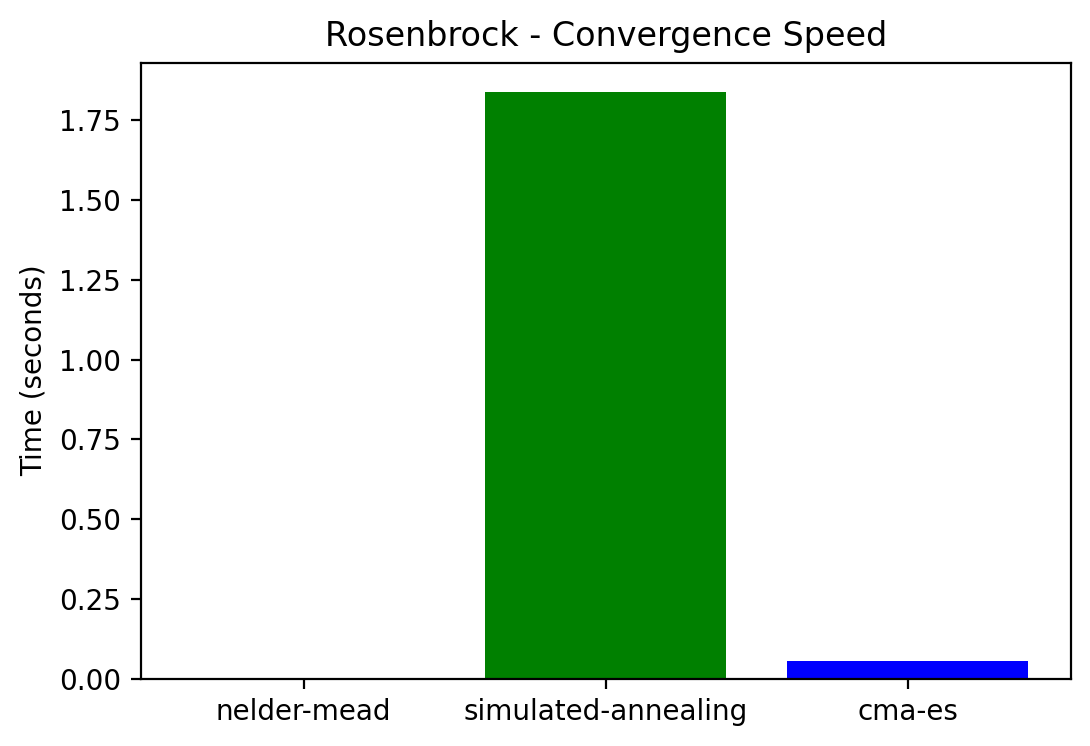

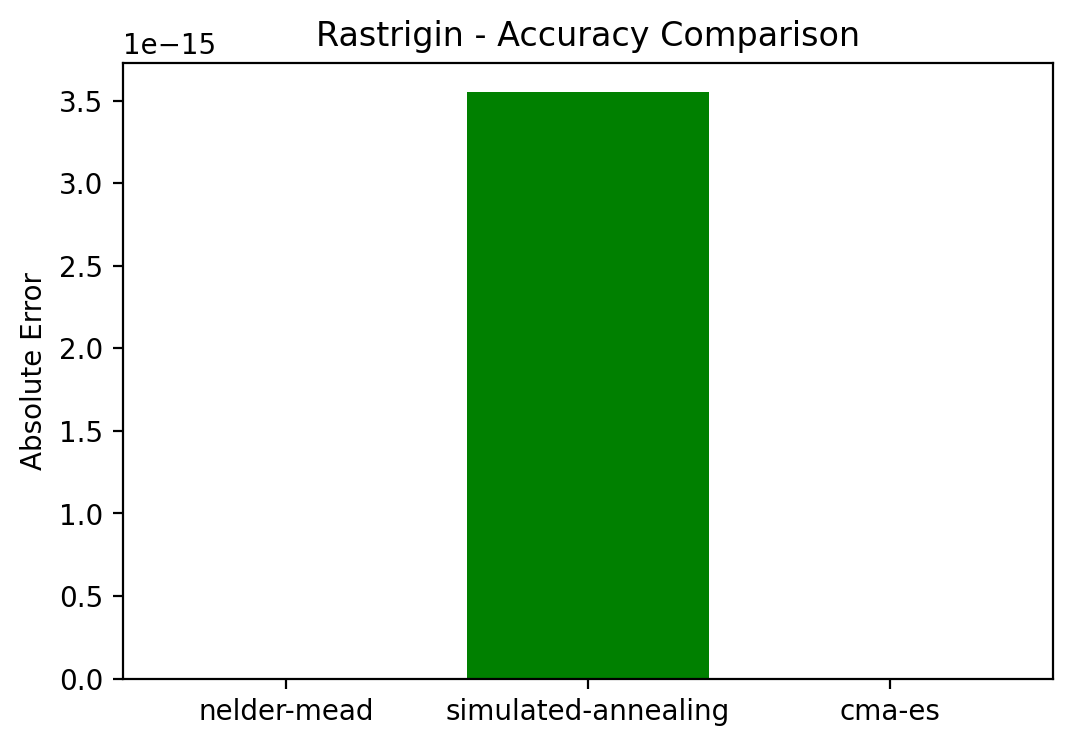

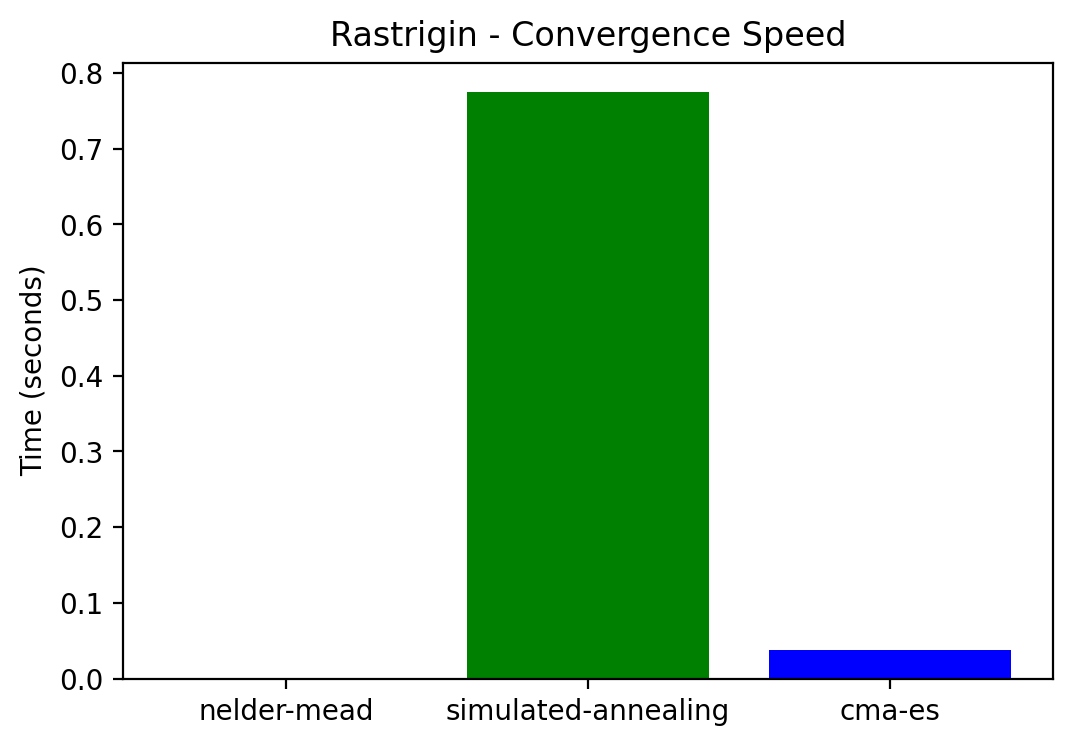

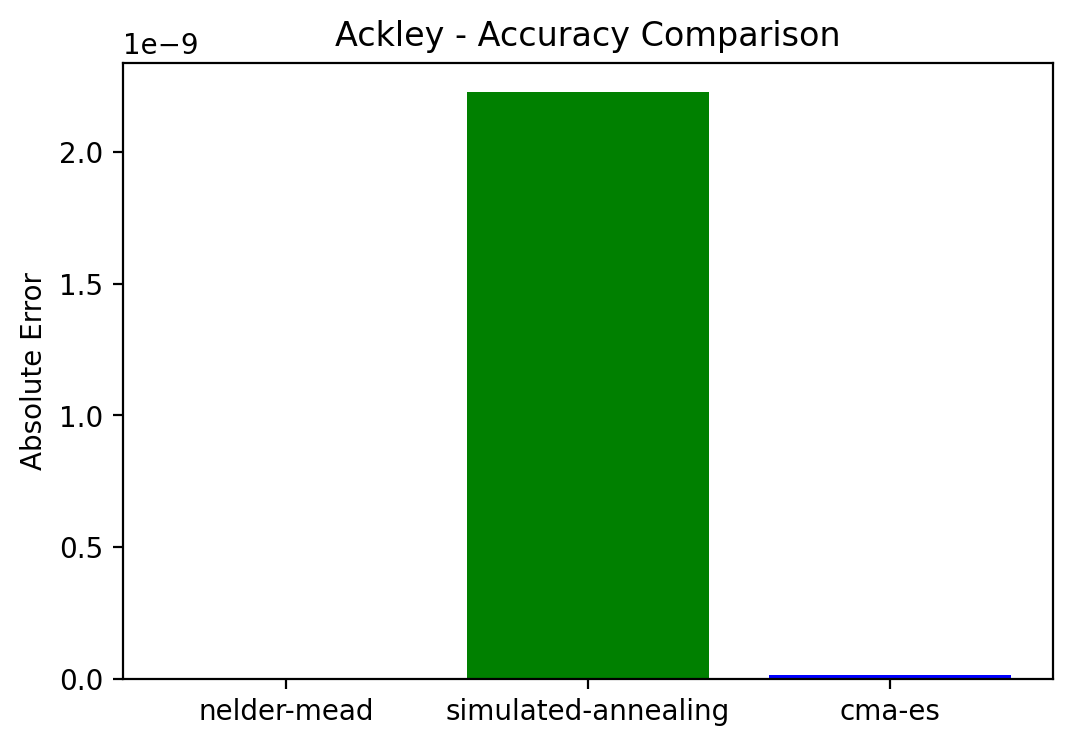

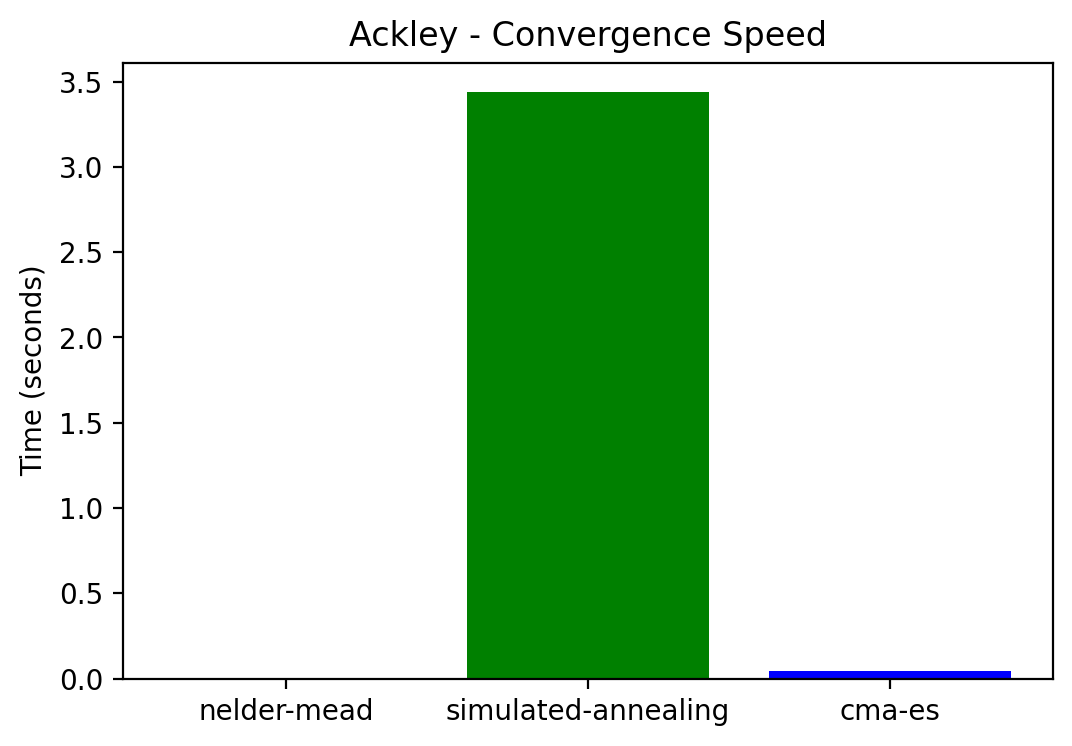

In [52]:
def plot_comparison(function_name, metric_key, y_axis_label, plot_title):
    """
    Plots a bar chart comparing optimization methods based on a given metric.
    
    Parameters:
    - function_name: The name of the function being optimized.
    - metric_key: The metric to plot ('error' or 'time').
    - y_axis_label: Label for the Y-axis.
    - plot_title: Title of the plot.
    """
    plt.figure(figsize=(6, 4))
    metric_values = [optimization_results[function_name][method][metric_key] for method in optimization_methods]
    plt.bar(optimization_methods, metric_values, color=['red', 'green', 'blue'])
    plt.ylabel(y_axis_label)
    plt.title(f"{function_name} - {plot_title}")
    plt.show()

for function_name in benchmark_functions.keys():
    plot_comparison(function_name, 'error', 'Absolute Error', 'Accuracy Comparison')
    plot_comparison(function_name, 'time', 'Time (seconds)', 'Convergence Speed')


# Task 2

In [53]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
import cma
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Loading MNIST

In [54]:
mnist_data = fetch_openml('mnist_784', version=1)
features, labels = mnist_data.data.astype(np.float32) / 255.0, mnist_data.target.astype(int)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features[:5000], labels[:5000], test_size=0.2, random_state=42)

### Defining SVM

In [56]:
train_size = 400
test_size = 100
#80-20 split, smaller dataset for faster computation

In [57]:
def evaluate_svm(hyperparams):
    reg_param, kernel_scale = 10**hyperparams[0], 10**hyperparams[1]
    classifier = SVC(C=reg_param, gamma=kernel_scale, kernel='rbf')
    
    classifier.fit(X_train[:train_size], y_train[:train_size])
    predictions = classifier.predict(X_test[:test_size])
    
    # Return negative accuracy since optimization minimizes the function
    return -accuracy_score(y_test[:test_size], predictions)

### Function for HP optimization 

In [58]:
def optimize_hyperparameters(algorithm, num_runs=3):
    search_bounds = [(-3, 3), (-3, 3)]  #Bounds for log10 of C and gamma
    accuracies, times, eval_counts = [], [], []
    
    for _ in range(num_runs):
        start_time = time.time()
        evaluation_counter = 0
        
        #Wrapper function to count function evaluations
        def count_evaluations(hyperparams):
            nonlocal evaluation_counter
            evaluation_counter += 1
            return evaluate_svm(hyperparams)
        
        #Select the optimization algorithm
        if algorithm == 'nelder-mead':
            result = minimize(count_evaluations, x0=[0, 0], method='Nelder-Mead', options={'maxiter': 50})
        elif algorithm == 'simulated-annealing':
            result = dual_annealing(count_evaluations, bounds=search_bounds, maxiter=50)
        elif algorithm == 'cma-es':
            evolution_strategy = cma.CMAEvolutionStrategy([0, 0], 0.5)
            result = evolution_strategy.optimize(count_evaluations).result
            result = {'x': result[0], 'fun': result[1]}
        else:
            raise ValueError("Unknown optimization algorithm")
        
        elapsed_time = time.time() - start_time
        accuracies.append(-result['fun'])  # Convert back to positive accuracy
        times.append(elapsed_time)
        eval_counts.append(evaluation_counter)
    
    avg_accuracy = np.mean(accuracies)
    print(f"{algorithm} optimization completed: Average Accuracy = {avg_accuracy:.4f}")
    
    return {
        'accuracy_mean': avg_accuracy,
        'accuracy_std': np.std(accuracies),
        'time_mean': np.mean(times),
        'evaluations_mean': np.mean(eval_counts)
    }

### Computation 

In [59]:
optimization_methods = ['nelder-mead', 'simulated-annealing', 'cma-es']
results = {method: optimize_hyperparameters(method) for method in optimization_methods}

nelder-mead optimization completed: Average Accuracy = 0.1000
simulated-annealing optimization completed: Average Accuracy = 0.9100
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=373400, Sat Mar 29 22:50:35 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -1.200000000000000e-01 1.0e+00 5.41e-01  5e-01  7e-01 0:00.3
    2     12 -3.100000000000000e-01 1.4e+00 6.41e-01  7e-01  7e-01 0:00.5
    3     18 -8.700000000000000e-01 1.3e+00 6.60e-01  7e-01  7e-01 0:00.8
   18    108 -9.100000000000000e-01 1.4e+01 6.47e-01  1e-01  1e+00 0:04.0
   20    120 -9.100000000000000e-01 1.4e+01 3.51e-01  5e-02  6e-01 0:04.3
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=404149, Sat Mar 29 22:50:39 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -1.500000000000000e-01 1.0e+00 4.76e-01  5e-01  5e-01 0:00.3
    2     12 -2.100000000000000e-01 1.1e+00 5.11e-01  4e-01  5e-01 0:00.5
    3     18 -9.1000000000

### Plots

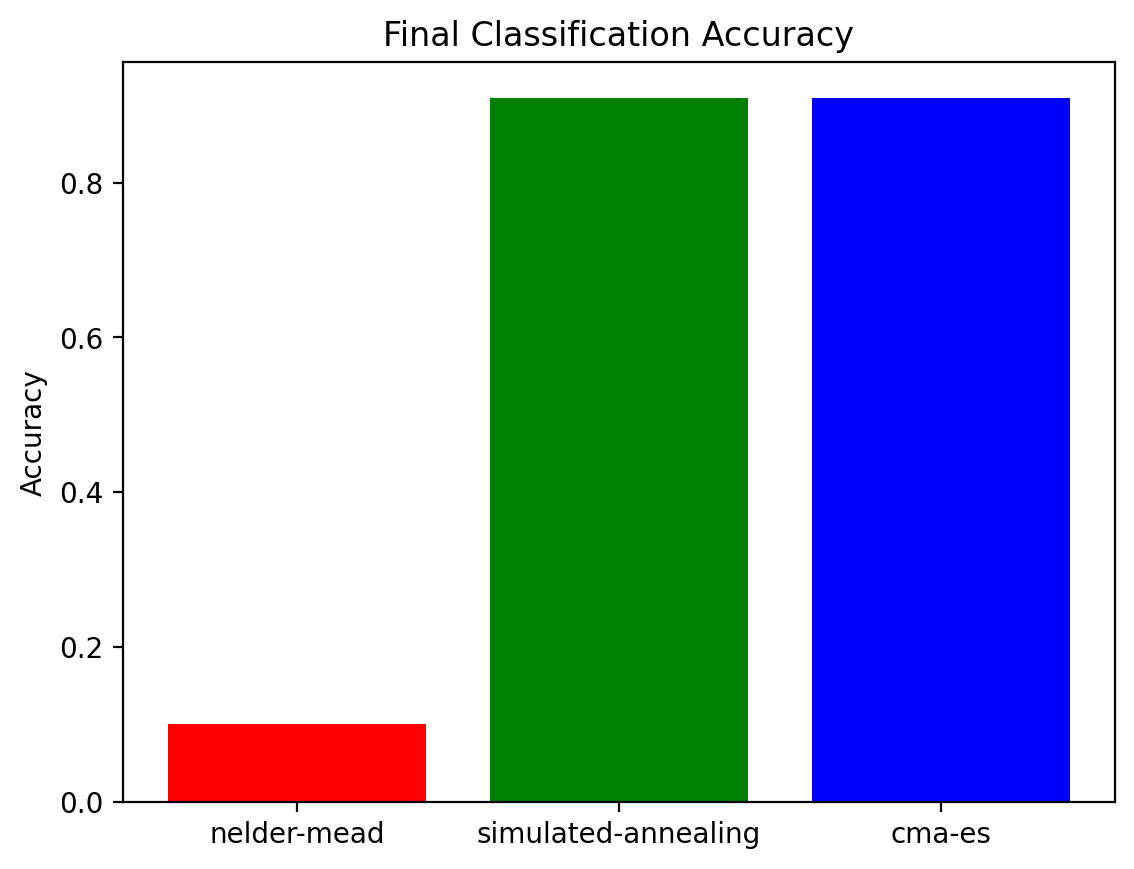

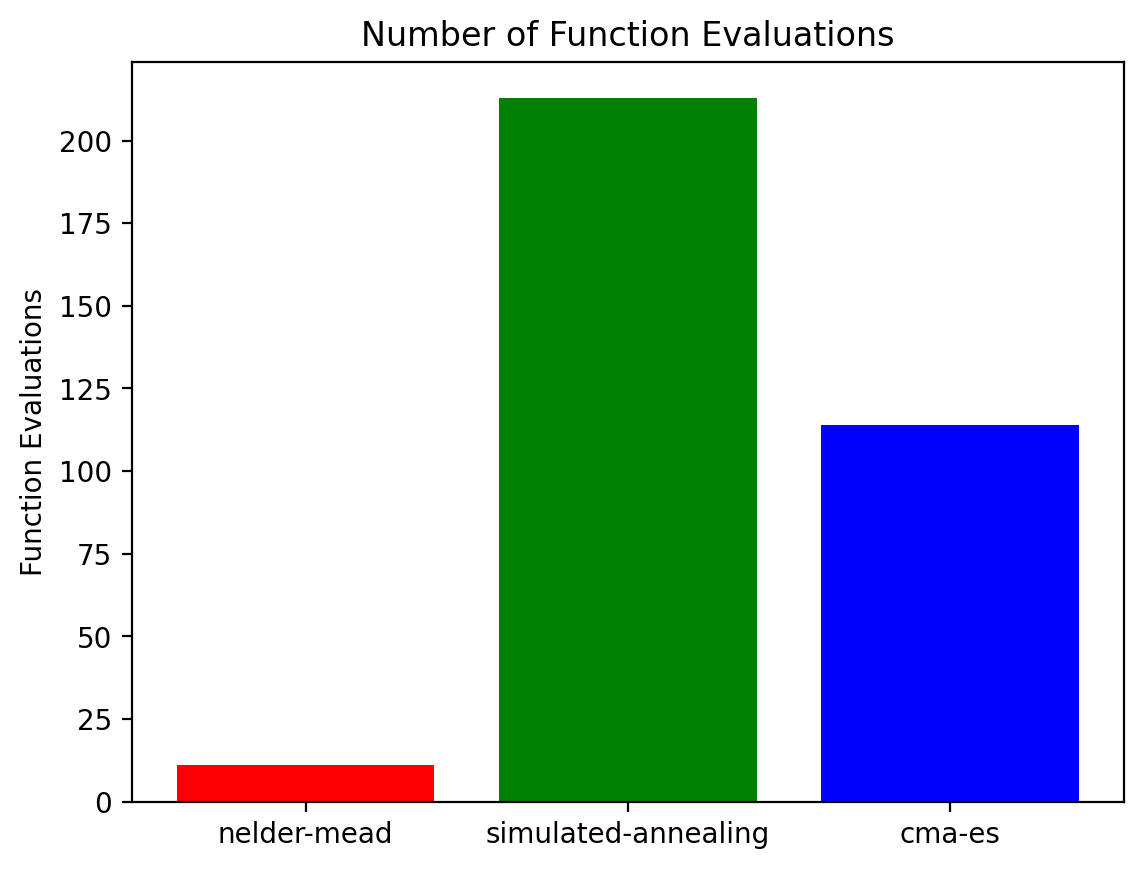

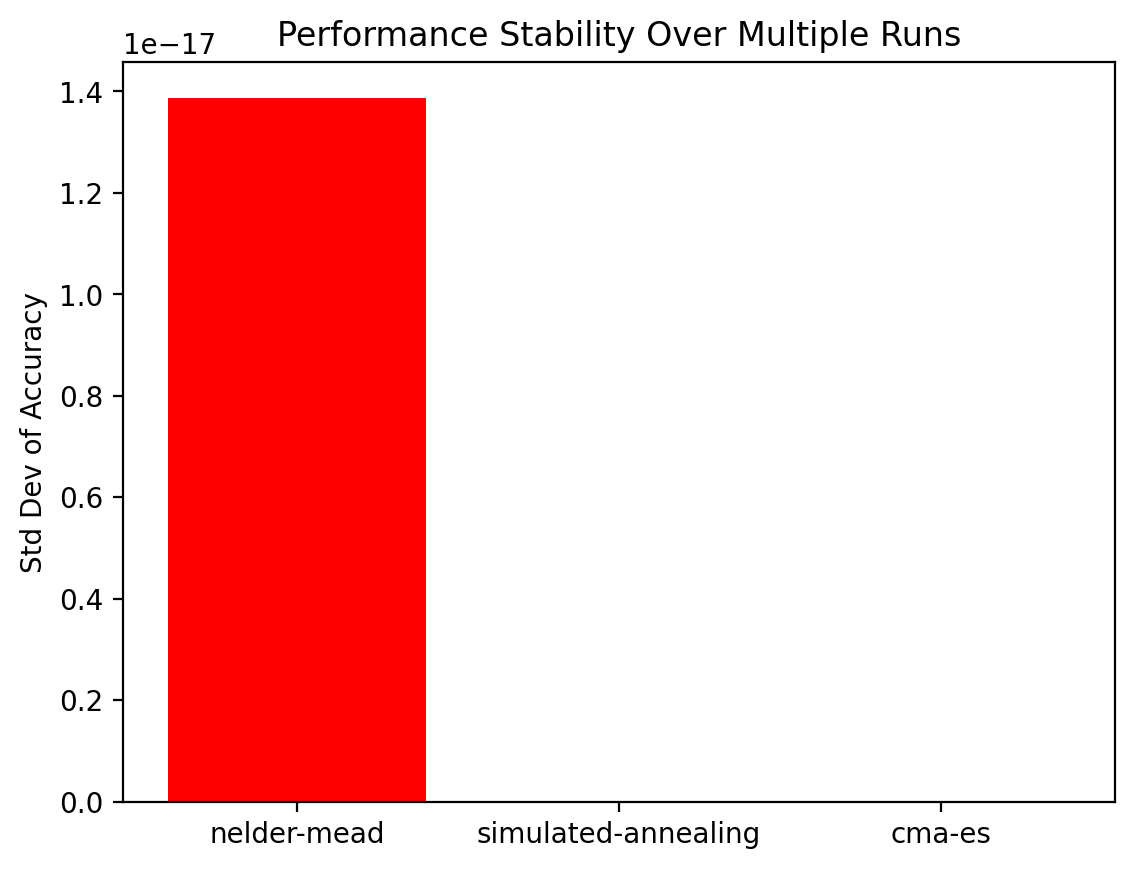

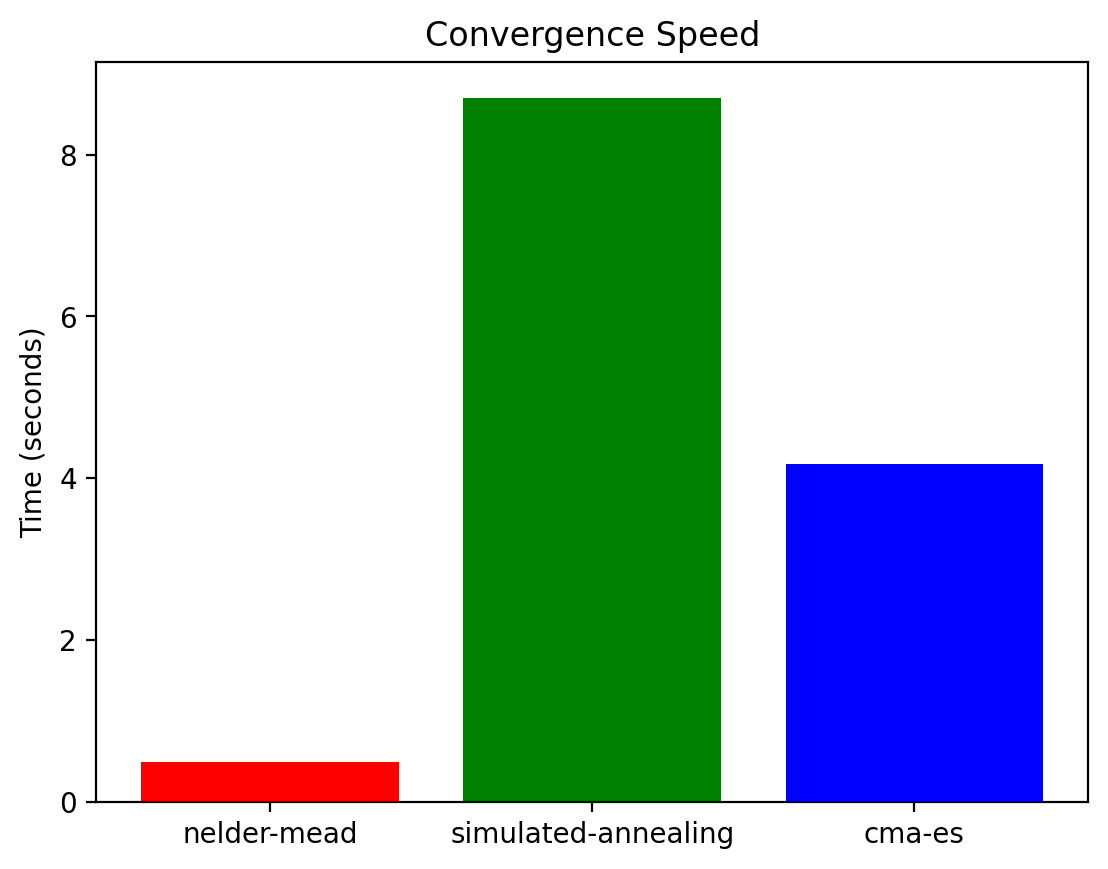

In [60]:
def plot_comparison(metric_key, y_label, chart_title):
    metric_values = [results[method][metric_key] for method in optimization_methods]
    plt.bar(optimization_methods, metric_values, color=['red', 'green', 'blue'])
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.show()

plot_comparison('accuracy_mean', 'Accuracy', 'Final Classification Accuracy')
plot_comparison('evaluations_mean', 'Function Evaluations', 'Number of Function Evaluations')
plot_comparison('accuracy_std', 'Std Dev of Accuracy', 'Performance Stability Over Multiple Runs')
plot_comparison('time_mean', 'Time (seconds)', 'Convergence Speed')


In [61]:
import pandas as pd
results_df = pd.DataFrame.from_dict(results, orient='index')

results_df

,accuracy_mean,accuracy_std,time_mean,evaluations_mean
nelder-mead,0.10,1.387779e-17,0.493841,11.0
simulated-annealing,0.91,0.000000e+00,8.704702,213.0
cma-es,0.91,0.000000e+00,4.174246,114.0


# Task 3

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
import cma
from mpl_toolkits.mplot3d import Axes3D

### Optimizations 

In [63]:
def rosenbrock(x):
    x = np.array(x)
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

bounds = [(-2, 2), (-2, 2)]
#5 random initial points within the bounds (-2, 2) for each dimension
initial_points = [np.random.uniform(-2, 2, 2) for _ in range(5)]

trajectories = {}
final_solutions = {}

In [64]:
initial_points

[array([-1.98848876, -0.85952907]),
 array([-1.75221086, -1.72427317]),
 array([ 0.21434176, -1.20125234]),
 array([-0.59414443, -0.17469951]),
 array([-1.18182917,  1.23886196])]

In [65]:
# Nelder-Mead Optimization
for i, x0 in enumerate(initial_points):
    res = minimize(rosenbrock, x0, method='Nelder-Mead', options={'return_all': True})
    trajectories[f'Nelder-Mead-{i}'] = np.array(res.allvecs)
    final_solutions[f'Nelder-Mead-{i}'] = res.x

# Simulated Annealing Optimization
def sa_callback(x, f, context):
    sa_traj.append(np.copy(x))

for i, x0 in enumerate(initial_points):
    sa_traj = []
    result = dual_annealing(rosenbrock, bounds, callback=sa_callback)
    trajectories[f'SA-{i}'] = np.array(sa_traj)
    final_solutions[f'SA-{i}'] = result.x

# CMA-ES Optimization
for i, x0 in enumerate(initial_points):
    es = cma.CMAEvolutionStrategy(x0, 0.5)
    cma_traj = []
    while not es.stop():
        solutions = es.ask()
        es.tell(solutions, [rosenbrock(x) for x in solutions])
        cma_traj.append(es.best.x)
    trajectories[f'CMA-ES-{i}'] = np.array(cma_traj)
    final_solutions[f'CMA-ES-{i}'] = es.best.x

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=417277, Sat Mar 29 22:50:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=344982, Sat Mar 29 22:50:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=358861, Sat Mar 29 22:50:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=391844, Sat Mar 29 22:50:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=363473, Sat Mar 29 22:50:48 2025)


### Plots 

In [66]:
# from matplotlib import colormaps
# list(colormaps)

In [67]:
trajectories.keys()

dict_keys(['Nelder-Mead-0', 'Nelder-Mead-1', 'Nelder-Mead-2', 'Nelder-Mead-3', 'Nelder-Mead-4', 'SA-0', 'SA-1', 'SA-2', 'SA-3', 'SA-4', 'CMA-ES-0', 'CMA-ES-1', 'CMA-ES-2', 'CMA-ES-3', 'CMA-ES-4'])

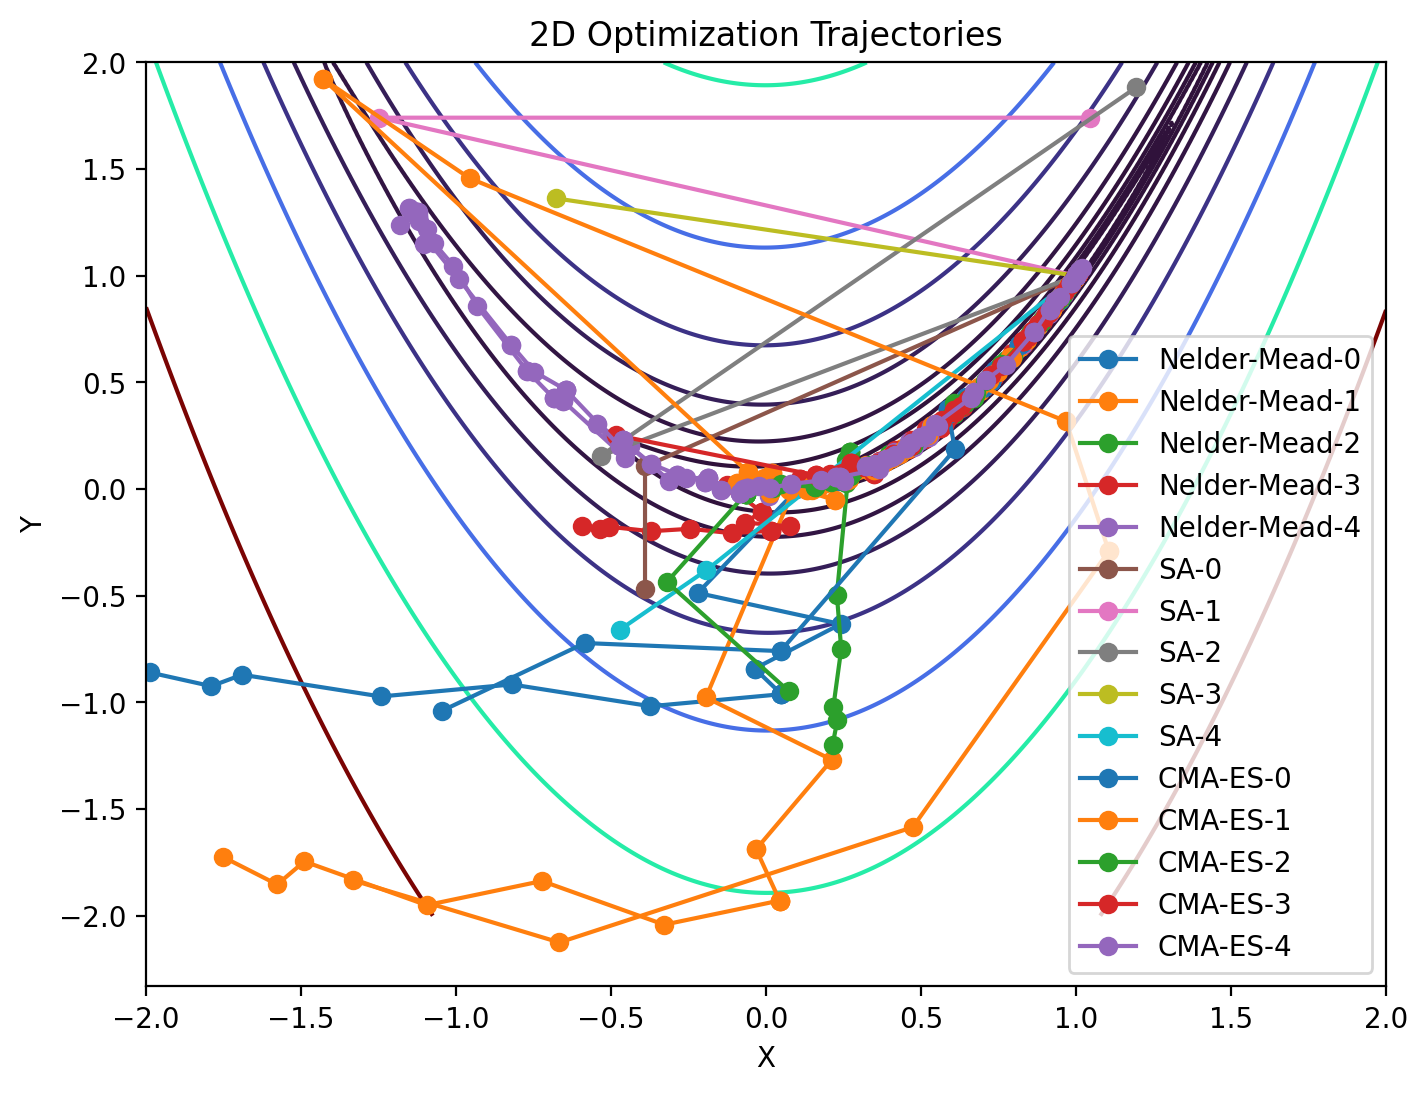

In [68]:
#2D Trajectory Plot
plt.figure(figsize=(8, 6))
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = np.array([rosenbrock([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='turbo')

for key, traj in trajectories.items():
    plt.plot(traj[:, 0], traj[:, 1], marker='o', label=key)
plt.legend()
plt.title('2D Optimization Trajectories')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

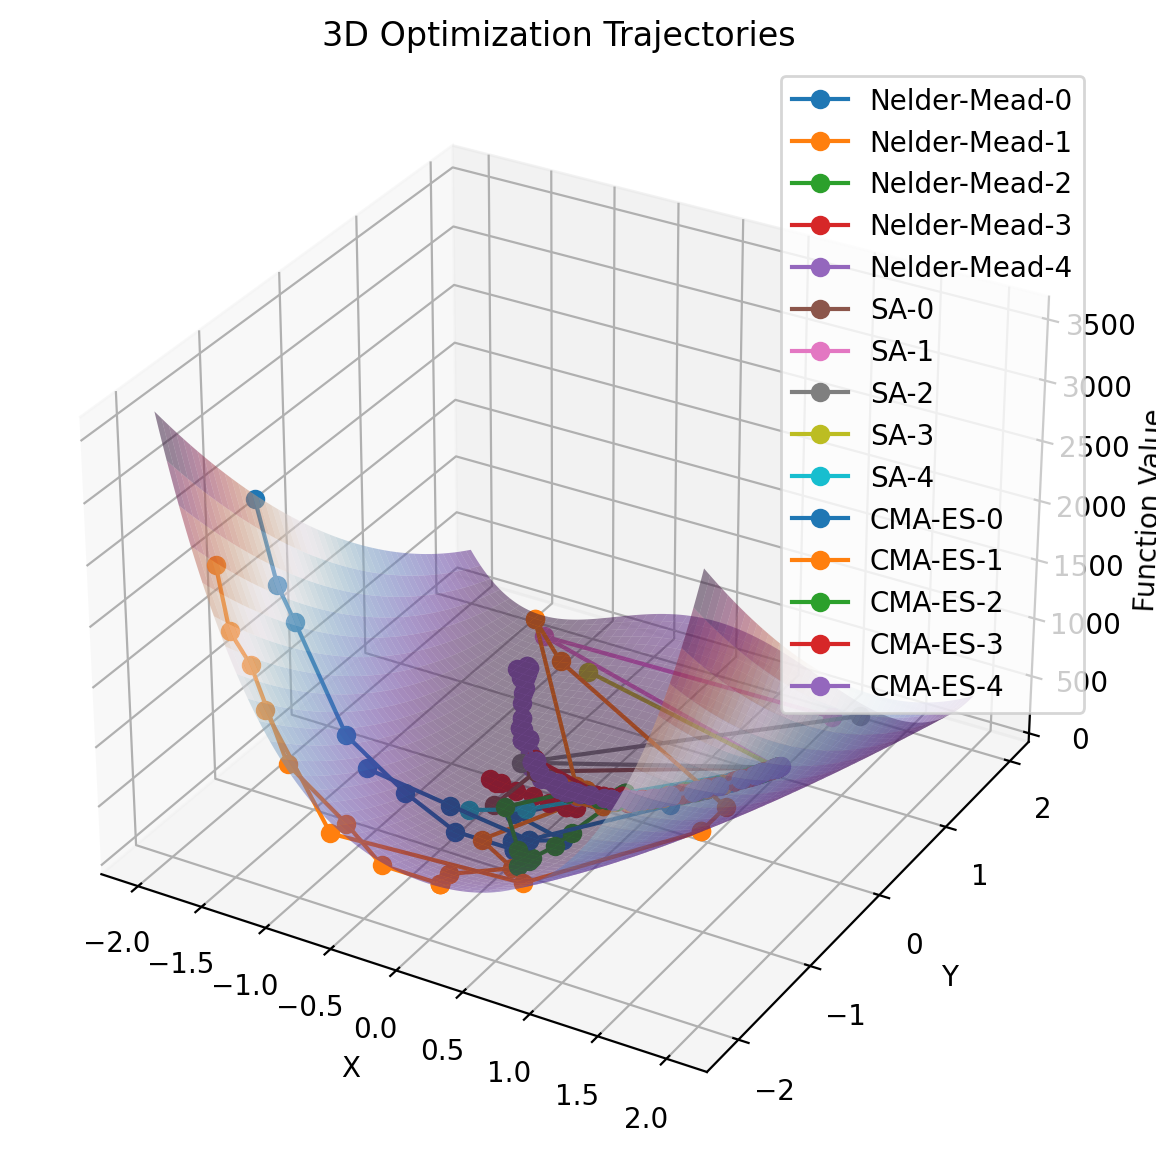

In [69]:
#3D Trajectory Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='twilight_shifted', alpha=0.5)

for key, traj in trajectories.items():
    ax.plot(traj[:, 0], traj[:, 1], [rosenbrock(p) for p in traj], marker='o', label=key)

ax.set_title('3D Optimization Trajectories')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function Value')
plt.legend()
plt.show()

/var/folders/r4/6gw7r2mj0t5g7qss7k7160940000gn/T/ipykernel_54480/2799800177.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(function_evals.values(), labels=function_evals.keys(), patch_artist=True,


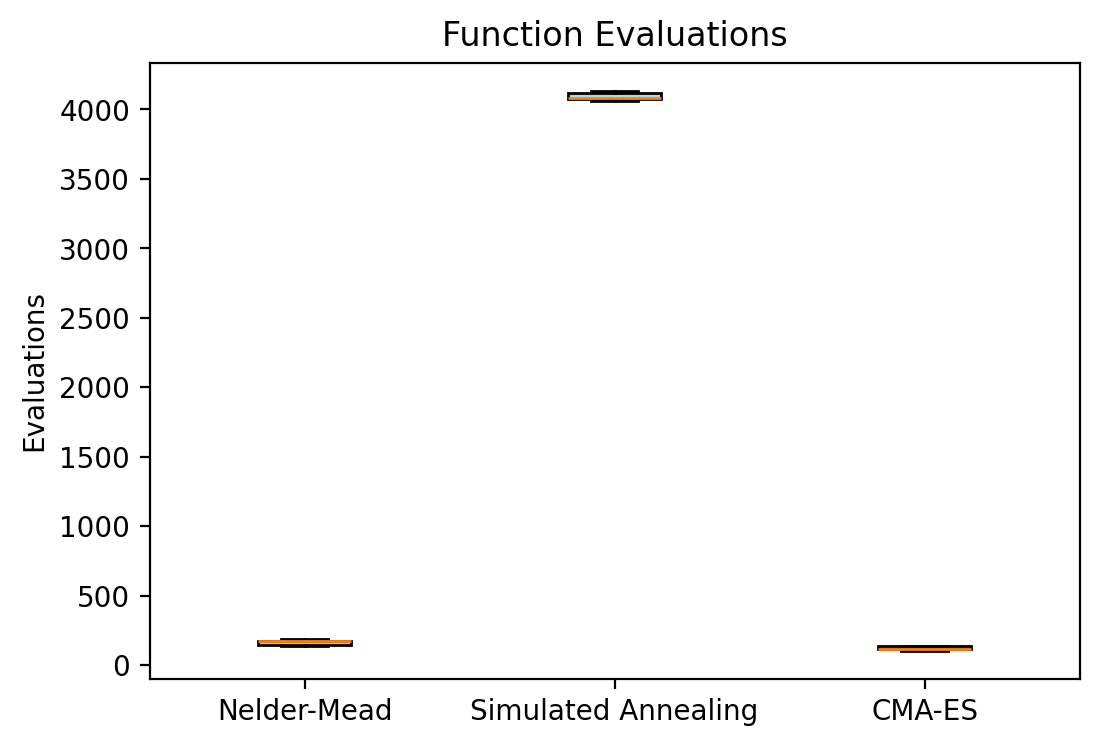

/var/folders/r4/6gw7r2mj0t5g7qss7k7160940000gn/T/ipykernel_54480/2799800177.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(final_values.values(), labels=final_values.keys(), patch_artist=True,


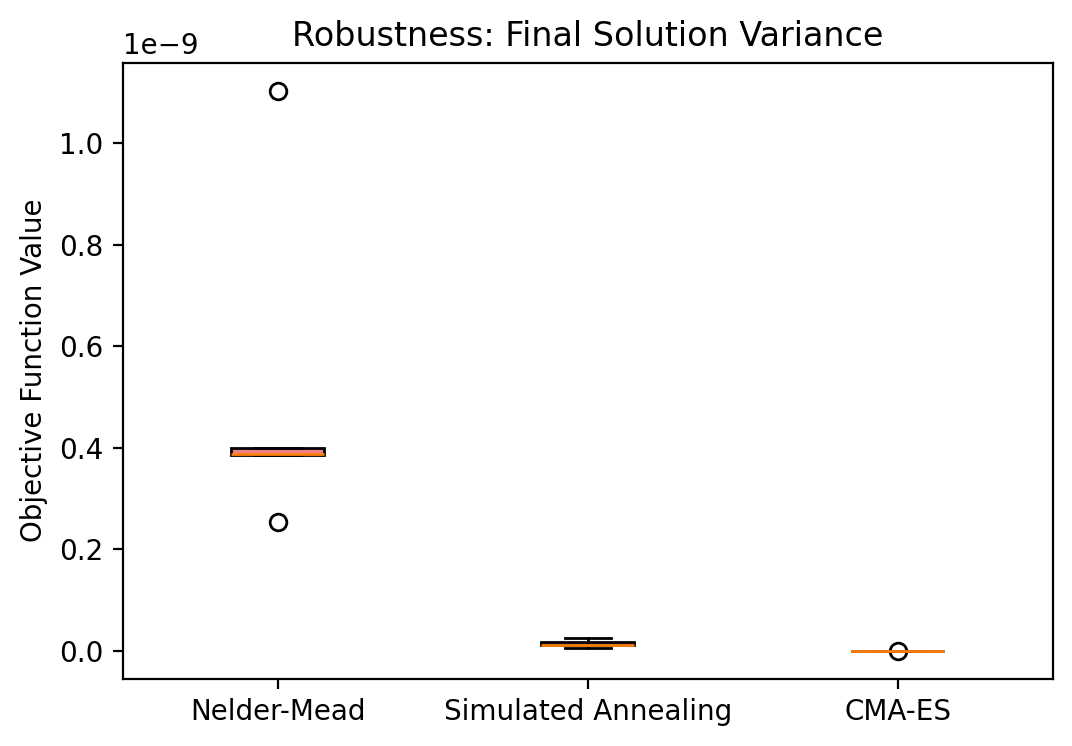

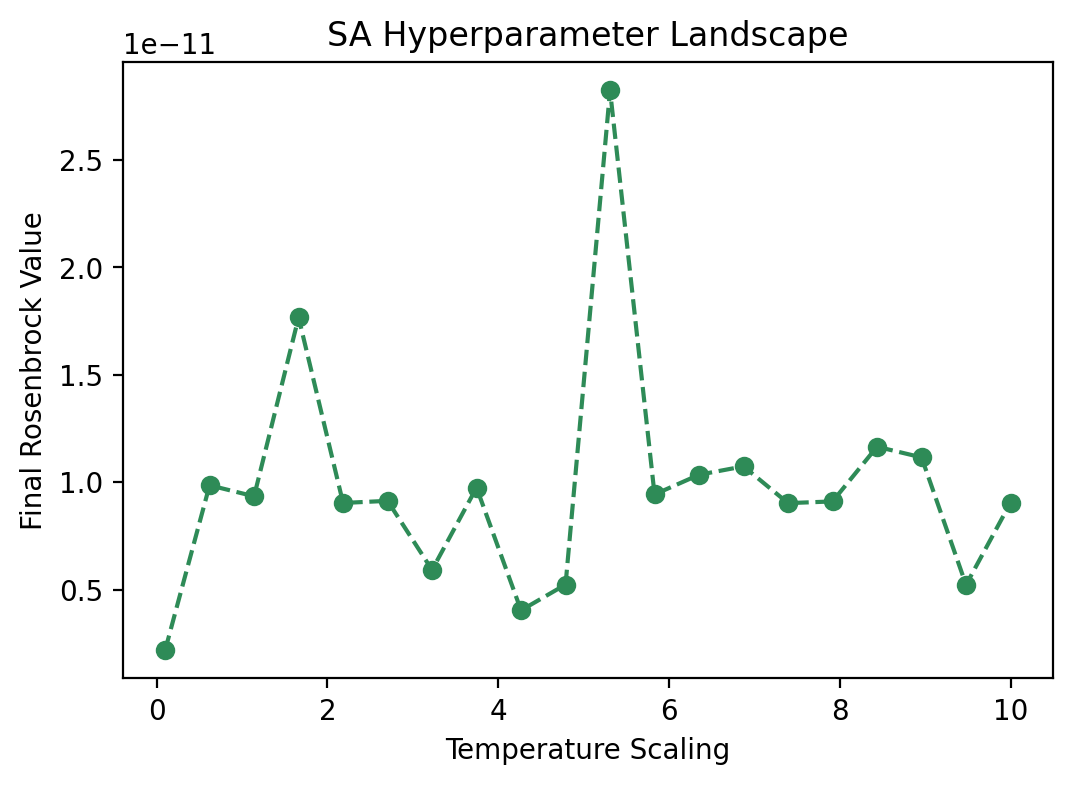

In [70]:
# Function Evaluations
function_evals = {
    'Nelder-Mead': [minimize(rosenbrock, x0, method='Nelder-Mead').nfev for x0 in initial_points],
    'Simulated Annealing': [dual_annealing(rosenbrock, bounds).nfev for _ in initial_points],
    'CMA-ES': [len(trajectories[f'CMA-ES-{i}']) for i in range(5)]
}

plt.figure(figsize=(6, 4))
plt.boxplot(function_evals.values(), labels=function_evals.keys(), patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
'''
This plot shows the number of function evaluations required by each optimization algorithm.
Lower values indicate higher efficiency in finding the solution.
'''
plt.title('Function Evaluations')
plt.ylabel('Evaluations')
plt.show()

# Final Objective Values
final_values = {
    'Nelder-Mead': [rosenbrock(final_solutions[f'Nelder-Mead-{i}']) for i in range(5)],
    'Simulated Annealing': [rosenbrock(final_solutions[f'SA-{i}']) for i in range(5)],
    'CMA-ES': [rosenbrock(final_solutions[f'CMA-ES-{i}']) for i in range(5)]
}

plt.figure(figsize=(6, 4))
plt.boxplot(final_values.values(), labels=final_values.keys(), patch_artist=True, 
            boxprops=dict(facecolor='lightcoral'))
'''
This plot shows the variance in the final objective function values achieved by each algorithm.
Lower variance and lower values indicate better robustness and accuracy in finding the global minimum.
'''
plt.title('Robustness: Final Solution Variance')
plt.ylabel('Objective Function Value')
plt.show()

# Simulated Annealing Hyperparameter Landscape
temps = np.linspace(0.1, 10, 20)
sa_performance = [dual_annealing(rosenbrock, bounds, maxfun=int(temp * 100)).fun for temp in temps]

plt.figure(figsize=(6, 4))
plt.plot(temps, sa_performance, marker='o', color='seagreen', linestyle='--')
'''
This plot illustrates the effect of temperature scaling on the performance of the Simulated Annealing algorithm.
It shows how the final objective value changes with different temperature settings.
'''
plt.xlabel('Temperature Scaling')
plt.ylabel('Final Rosenbrock Value')
plt.title('SA Hyperparameter Landscape')
plt.show()